In [ ]:
%%capture
!pip install shap

[19:47:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


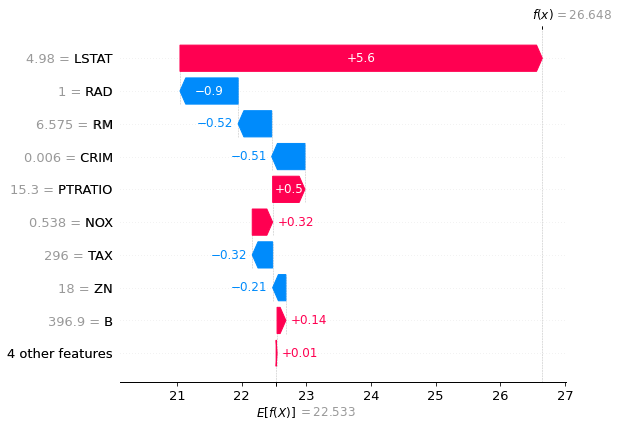

In [ ]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

The NOX row has played a positive effect on the prediction with value of f(x)=26.648 by affecting the predicition with +0.32 for the NOX (which has a value of 0.538). 
If it had a value of -0.73 like mentioned in the assignment, this would affect the prediction of the regression negatively by reducing the predicted value by 0.73.

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0])

In [ ]:
shap.initjs()
shap.plots.force(shap_values)

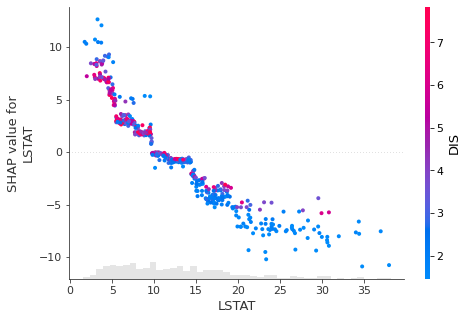

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"RM"], color=shap_values)

The colors here are showing us the value of the selected feature for the scatter plot, as shown in the legend to the right of the plot. Here, the "DIS" feature is taken as a color indicator, so what the plot is doing:
It is plotting the SHAP value for the "x" feature against the values of the "x" features while showing the intensity of the "y" feature through colors, and here x is LSTAT and y is DIS. It also shows the distribution of the LSTAT through histogram in light grey.
From this, we can say the position of the points shows the shap value for each data point for LSTAT (y-axis), the LSTAT value of every data point (x-axis), and the DIS value (color).

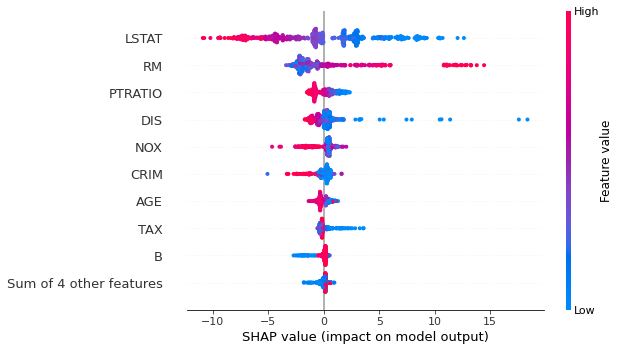

In [ ]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

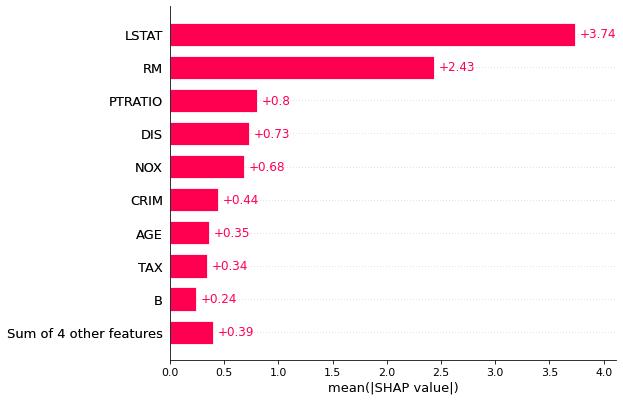

In [ ]:
shap.plots.bar(shap_values)